In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
data = pd.read_csv("diabetes.csv")

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [11]:
# prompt: handling with outlier from capping method

def treat_outliers(df,col):
    '''
    treats outliers from a given column, using capping method

    df: dataframe
    col: column with outliers
    '''
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    df[col]= np.where(
        df[col]>upper_limit, upper_limit, np.where(
            df[col]<lower_limit, lower_limit, df[col]
        )
    )

    return df[col]

# Apply the function to columns that may have outliers
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    data[col] = treat_outliers(data, col)

<ipython-input-12-f902baa249bb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


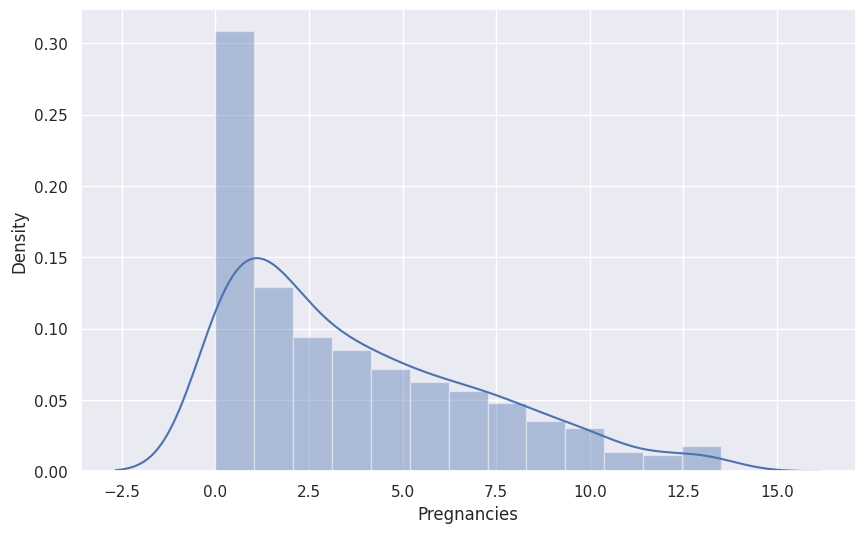

<ipython-input-12-f902baa249bb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


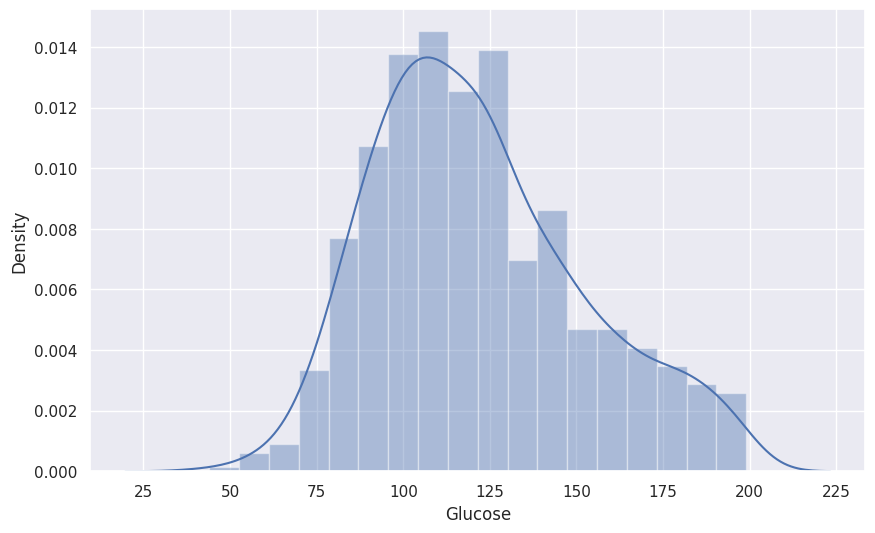

<ipython-input-12-f902baa249bb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


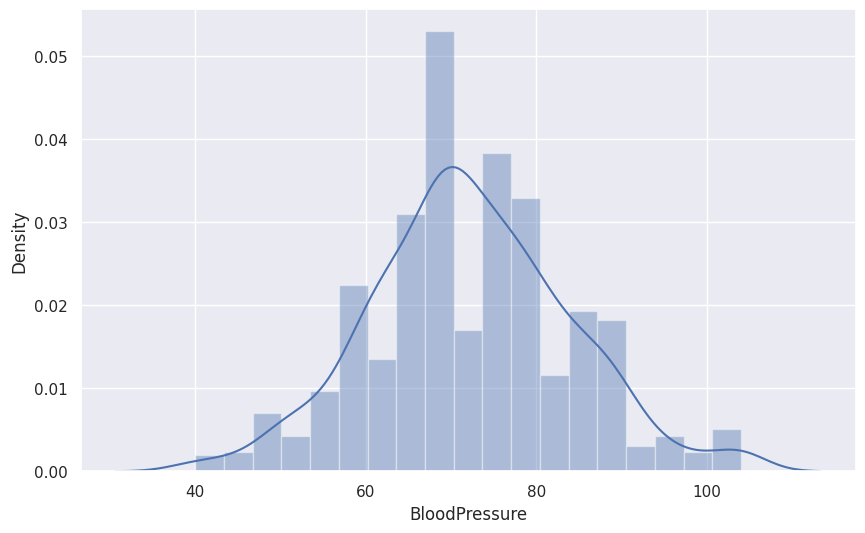

<ipython-input-12-f902baa249bb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


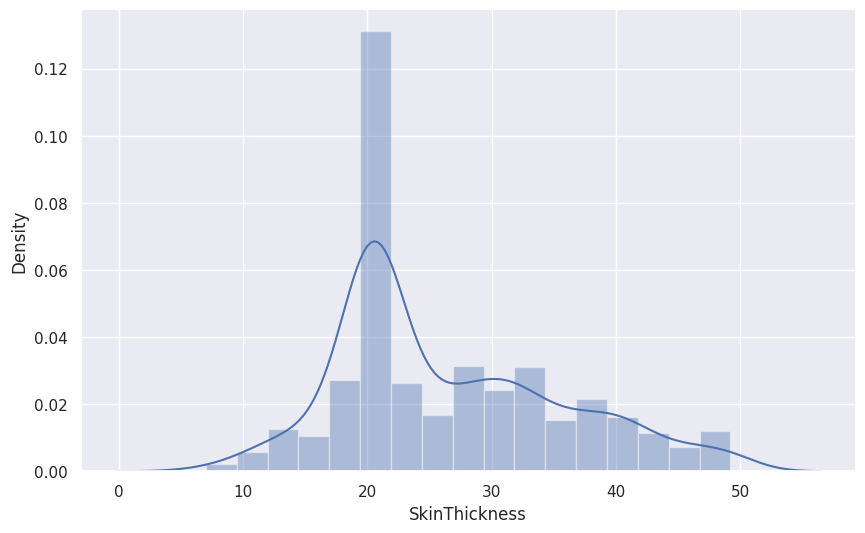

<ipython-input-12-f902baa249bb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


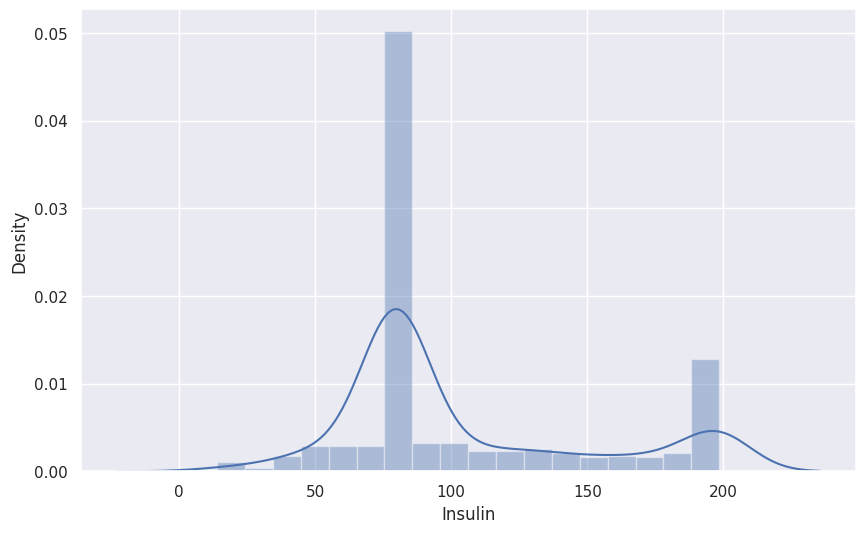

<ipython-input-12-f902baa249bb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


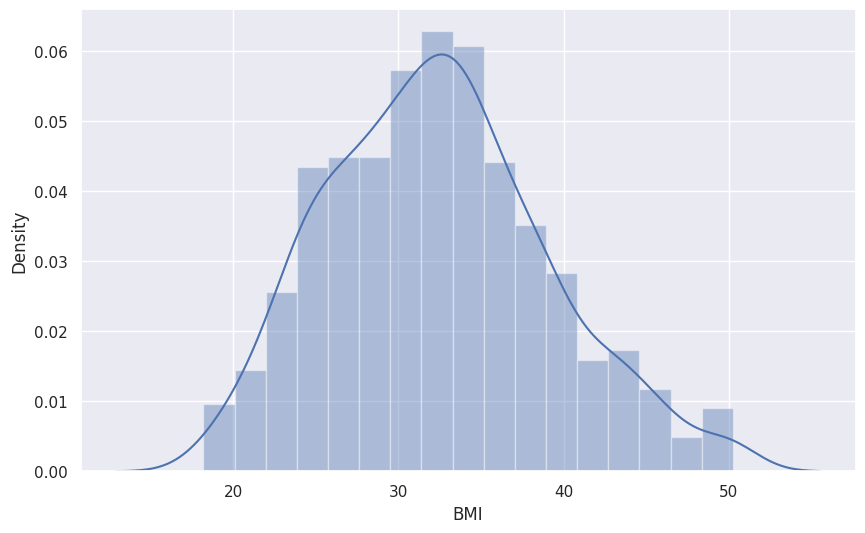

<ipython-input-12-f902baa249bb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


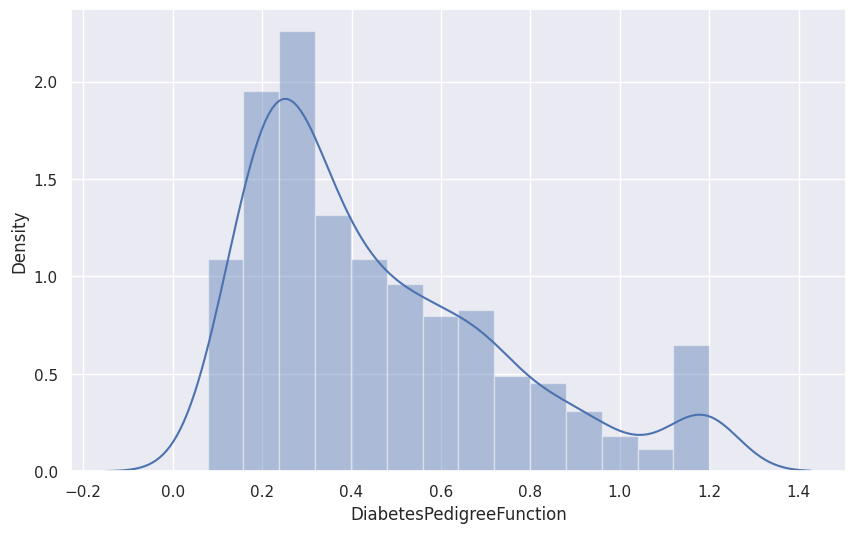

<ipython-input-12-f902baa249bb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


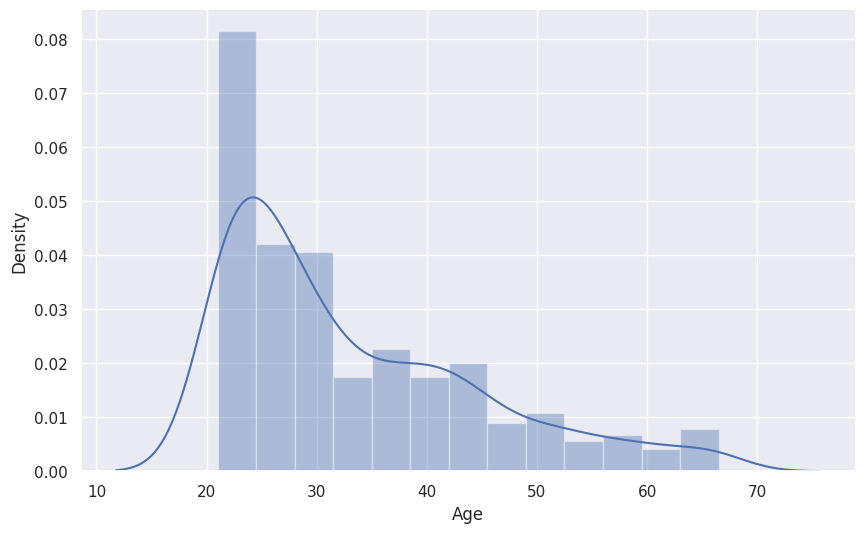

In [12]:
def distplot(df, col):
    '''
    plots distplot for a given column

    df: dataframe
    col: column for plotting
    '''
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col])
    plt.show()
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
  distplot(data, col)

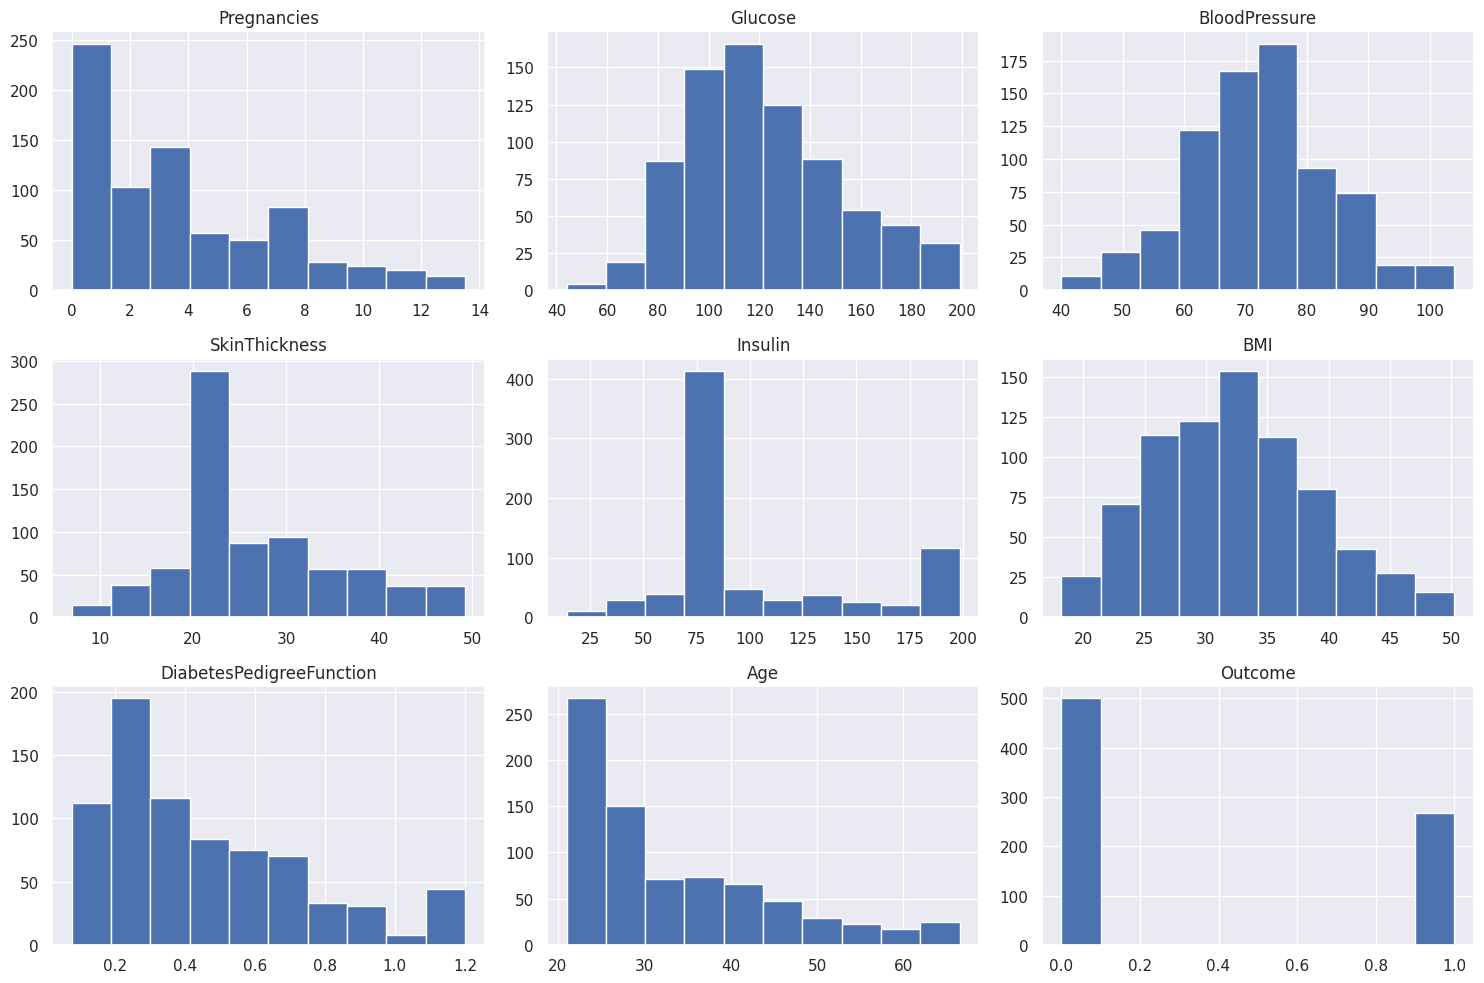

In [13]:
data.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

In [14]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47.0


In [15]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [16]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [17]:
X_scaled

array([[ 0.64714967,  0.86527574, -0.01931497, ...,  0.18174861,
         0.58892732,  1.44569096],
       [-0.84896998, -1.20598931, -0.53173732, ..., -0.86878338,
        -0.37810147, -0.189304  ],
       [ 1.24559754,  2.01597855, -0.70254478, ..., -1.36403417,
         0.74659506, -0.10325164],
       ...,
       [ 0.34792574, -0.02240928, -0.01931497, ..., -0.92881378,
        -0.74949659, -0.27535637],
       [-0.84896998,  0.14197684, -1.04415968, ..., -0.34351738,
        -0.38510892,  1.18753386],
       [-0.84896998, -0.94297153, -0.19012242, ..., -0.29849459,
        -0.50423566, -0.87772293]])

In [18]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.441035,Pregnancies
1,1.339859,Glucose
2,1.255376,BloodPressure
3,1.511652,SkinThickness
4,1.315979,Insulin
5,1.576817,BMI
6,1.052224,DiabetesPedigreeFunction
7,1.628047,Age


In [19]:
X_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [22]:
model.fit(X_train,y_train)

GaussianNB()

In [23]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)

with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [24]:
y_pred = model.predict(x_test)

In [25]:
print(accuracy_score(y_test, y_pred))

0.78125


In [27]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[108,  17],
       [ 25,  42]])

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [29]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.7454328358208955)

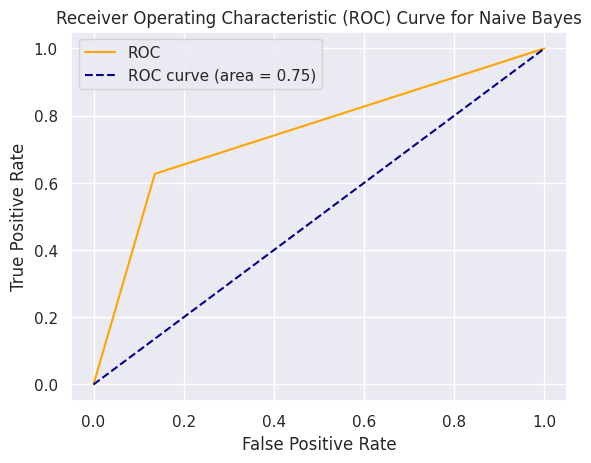

In [30]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred_logistic = log_reg.predict(x_test)

In [34]:
accuracy_logistic = accuracy_score(y_test,y_pred_logistic)
accuracy_logistic

0.7395833333333334

In [35]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_logistic)
conf_mat

array([[109,  16],
       [ 34,  33]])

In [37]:
# ROC
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_logistic)

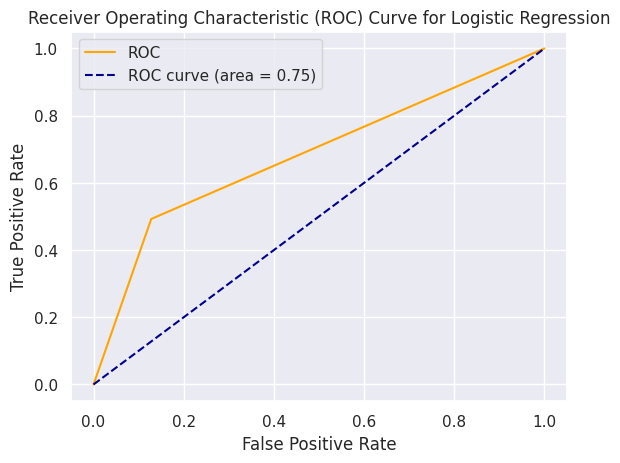

In [38]:
plt.plot(fpr_logistic, tpr_logistic, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics  import roc_auc_score

In [40]:
auc_naive=roc_auc_score(y_test,y_pred)
auc_naive

np.float64(0.7454328358208955)

In [41]:
auc_logistic=roc_auc_score(y_test,y_pred_logistic)
auc_logistic

np.float64(0.6822686567164179)

In [43]:
# prompt: dont use metadata.widgets

# Define interactive widgets for input
pregnancies_widget = IntSlider(min=0, max=17, step=1, description='Pregnancies:', metadata={'value': 2})
glucose_widget = FloatSlider(min=0, max=200, step=1.0, description='Glucose:', metadata={'value': 120.0})
bloodpressure_widget = FloatSlider(min=0, max=150, step=1.0, description='Blood Pressure:', metadata={'value': 70.0})
skinthickness_widget = FloatSlider(min=0, max=100, step=1.0, description='Skin Thickness:', metadata={'value': 30.0})
insulin_widget = FloatSlider(min=0, max=900, step=1.0, description='Insulin:', metadata={'value': 100.0})
bmi_widget = FloatSlider(min=0, max=70, step=0.1, description='BMI:', metadata={'value': 25.5})
diabetespedigreefunction_widget = FloatSlider(min=0, max=2.5, step=0.01, description='Diabetes Pedigree Function:', metadata={'value': 0.5})
age_widget = IntSlider(min=0, max=120, step=1, description='Age:', metadata={'value': 30})

output_text = Text(description="Prediction:", disabled=True)

def on_predict_button_clicked(b):
    p = pregnancies_widget.value
    g = glucose_widget.value
    bp = bloodpressure_widget.value
    st = skinthickness_widget.value
    ins = insulin_widget.value
    b_val = bmi_widget.value # Renamed to avoid conflict
    dpf = diabetespedigreefunction_widget.value
    a = age_widget.value

    result, probability = predict_diabetes(p, g, bp, st, ins, b_val, dpf, a)
    output_text.value = f"{result} (Probability: {probability:.2f})"

predict_button = Button(description="Predict")
predict_button.on_click(on_predict_button_clicked)

# Arrange widgets in a VBox
input_widgets = VBox([
    pregnancies_widget,
    glucose_widget,
    bloodpressure_widget,
    skinthickness_widget,
    insulin_widget,
    bmi_widget,
    diabetespedigreefunction_widget,
    age_widget,
    predict_button,
    output_text
])

# Display the interactive application
print("Enter patient information and click 'Predict':")
display(input_widgets)


Enter patient information and click 'Predict':
